## ICE-7. MPEG-7 Color Layout Descriptor
Please download the images from the following link:<br>
https://drive.google.com/file/d/1h0JFzpyc7zNZiln5Ls74CfvOfhtl51XK/view?usp=sharing <br><br>
Please refer to the following link for the code of Color Layout Descriptor: <br>
https://github.com/scferrada/imgpedia

## Task 1. Please using the given code to extract the color layout features from the downloaded image 001.jpg, and display it.

In [1]:
import cv2
import numpy as np

class ColorLayoutComputer:

    def __init__(self):
        self.rows = 8
        self.cols = 8
        self.prefix = "CLD"

    def compute(self, img):
        averages = np.zeros((self.rows,self.cols,3))
        imgH, imgW, _ = img.shape
        for row in range(self.rows):
            for col in range(self.cols):
                slice = img[int(imgH/self.rows * row): int(imgH/self.rows * (row+1)), int(imgW/self.cols*col) : int(imgW/self.cols*(col+1))]
                average_color_per_row = np.mean(slice, axis=0)
                average_color = np.mean(average_color_per_row, axis=0)
                average_color = np.uint8(average_color)
                averages[row][col][0] = average_color[0]
                averages[row][col][1] = average_color[1]
                averages[row][col][2] = average_color[2]
        icon = cv2.cvtColor(np.array(averages, dtype=np.uint8), cv2.COLOR_BGR2YCR_CB)
        y, cr, cb = cv2.split(icon)
        dct_y = cv2.dct(np.float32(y))
        dct_cb = cv2.dct(np.float32(cb))
        dct_cr = cv2.dct(np.float32(cr))
        dct_y_zigzag = []
        dct_cb_zigzag = []
        dct_cr_zigzag = []
        flip = True
        flipped_dct_y = np.fliplr(dct_y)
        flipped_dct_cb = np.fliplr(dct_cb)
        flipped_dct_cr = np.fliplr(dct_cr)
        for i in range(self.rows + self.cols - 1):
            k_diag = self.rows - 1 - i
            diag_y = np.diag(flipped_dct_y, k=k_diag)
            diag_cb = np.diag(flipped_dct_cb, k=k_diag)
            diag_cr = np.diag(flipped_dct_cr, k=k_diag)
            if flip:
                diag_y = diag_y[::-1]
                diag_cb = diag_cb[::-1]
                diag_cr = diag_cr[::-1]
            dct_y_zigzag.append(diag_y)
            dct_cb_zigzag.append(diag_cb)
            dct_cr_zigzag.append(diag_cr)
            flip = not flip
        return np.concatenate([np.concatenate(dct_y_zigzag), np.concatenate(dct_cb_zigzag), np.concatenate(dct_cr_zigzag)])

# Load the image
image_path = "001.jpg"
img = cv2.imread(image_path)

# Create an instance of the ColorLayoutComputer class
computer = ColorLayoutComputer()

# Compute the color layout descriptor
descriptor = computer.compute(img)

# Display the descriptor
print(descriptor)


[ 7.54875000e+02 -3.71453323e+01 -2.75390893e-01 -2.05506821e+02
  7.78468102e-02 -2.34176540e+01 -3.93178177e+01  3.43435440e+01
  2.75409832e+01 -5.34272051e+00 -4.38750000e+01  5.65796041e+00
  2.59727240e+00 -2.54444008e+01 -1.43750000e+01 -2.34878922e+01
  2.55022869e+01  2.20043163e+01 -3.80048065e+01 -5.47946072e+00
  6.65629059e-02  5.35990372e+01 -1.31532040e+01  2.22179368e-01
  4.08514328e+01 -2.71923709e+00 -2.33335533e+01 -7.21246767e+00
 -2.86610723e+00  1.22206163e+01  3.80418777e+00 -3.12251759e+01
  3.03049412e+01  1.38942504e+00  7.60543251e+00  1.85286961e+01
  1.82548904e+01 -2.60280678e-03 -1.26275692e+01  2.58750000e+01
  2.63148155e+01 -3.00260210e+00 -2.30272079e+00 -2.49541059e-01
 -1.75480080e+01  2.62883568e+01  8.04879284e+00 -2.93222847e+01
  1.81053467e+01 -1.63744450e+01 -1.93038082e+01  1.69019365e+00
  8.70240688e+00  1.83429193e+00  4.75085020e+00  5.05936050e+00
 -1.27258711e+01 -8.98755074e+00 -8.12548637e+00  6.52728260e-01
  2.36595964e+00 -1.14373

## Task 2. Retrieve the image that is the most similar to image 001.jpg from the downloaded images (not itself).
Please try to use at least three different metrics to measure the distance between color layout descriptors (L1 distance, L2 distance, earth mover's distance, etc)

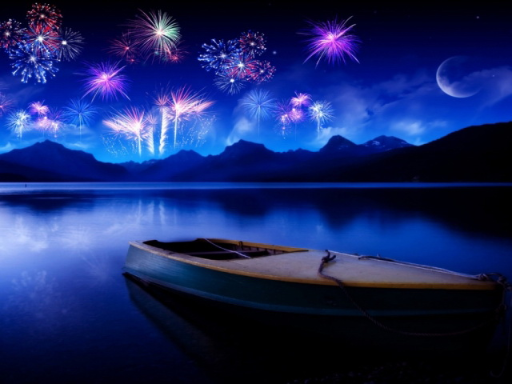

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def compute_l2_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

img1 = cv2.imread('001.jpg')
img1 = cv2.resize(img1, (512, 384))

# downloaded images
images = ['002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg',
          '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg']

# using l2 distance
similar_image = None
min_dist = float('inf')

for img_path in images:
    if img_path != '001.jpg':
        img2 = cv2.imread(img_path)

        if img2 is not None:
            img2 = cv2.resize(img2, (512, 384))

            dist = compute_l2_distance(img1, img2)
            if dist < min_dist:
                min_dist = dist
                similar_image = img2

if similar_image is not None:
    cv2_imshow(similar_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("similar image not found using l2 distance.")


## Question 1. Please answer if the outputs of Task 2 are the same. If the outputs are different, based on your perspective, which metrics gives the most similar retrieval? If the outputs are the same, do you think we can use any metrics to compare the color layout features in any cases? Give an explanation to your answer.

**Answer to Q1**:

Observed output of the images not similar to original image.This metric measures the pixel-wise absolute difference between the original image and each downloaded image, summing up the differences. The image with the smallest L2 distance is considered the most similar.However, the L2 distance metric may not always be the best choice for comparing color layout features. The L2 distance primarily focuses on pixel intensity differences and does not consider the spatial arrangement of colors or the perceptual similarity of the images. It treats each pixel equally and may not adequately capture the higher-level features that define the color layout of an image.To compare color layout features, other metrics such as histogram-based metrics or perceptual similarity metrics like Structural Similarity Index (SSIM) or Mean Squared Error (MSE) can be more effective. These metrics take into account the distribution of colors and their spatial relationships, providing a more comprehensive evaluation of color layout similarity.


---

## Image Filtering



## (Tutorial) Convolutional filter
Please review the following article for further understanding of Convolutional layer in Convolutional Neural Network
https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/ <br>
Please download the image from the following link for the your program <br>
https://drive.google.com/file/d/1MSQ8e0nxoBIkcp5sdo8Vd-65b9okx6hX/view?usp=sharing

* use pip install opencv-python to install cv2

## Example. Convolutional filter

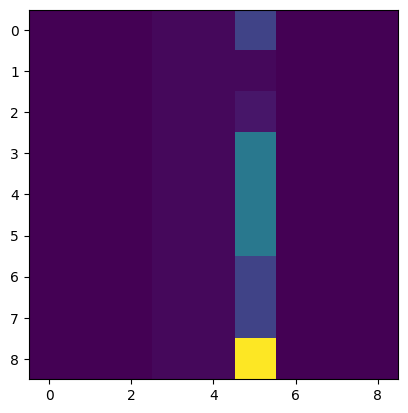

[[  0   0   0   5   0  77   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0   0]
 [  0   0   0   3   0 134   0   0   0]
 [  0   0   0   3   0 117   0   0   0]
 [  0   0   0   3   0 127   0   0   0]
 [  0   0   0   3   0  47   0   0   0]
 [  0   0   0   3   0  17   0   0   0]
 [  0   0   0   5   0 255   0   0   0]]


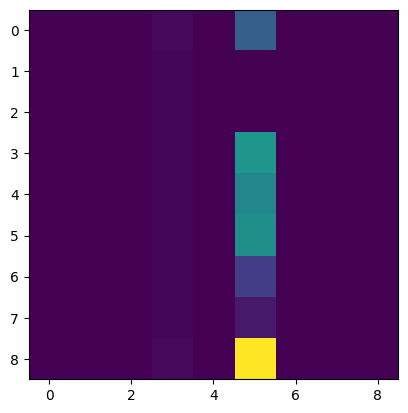

In [4]:
import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

# build the test data
data = np.array([[0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 20, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 10, 0, 0, 0],
       [0, 0, 0, 1, 1, 50, 0, 0, 0]], dtype='uint8')
plt.imshow(data)
pylab.show()

#build the convolutional kernel
fil = np.array([[ -1, -1, -1],
                [ -1, 8, -1],
                [ -1, -1, -1]])
#use filter2D to apply convolution
res = cv2.filter2D(data,-1,fil, borderType=cv2.BORDER_CONSTANT)
print(res)

plt.imshow(res)
pylab.show()

## Task 3. Building three different kernels for different purposes, and commenting the purpose of each kernel
For instance, the kernel in the example is using for edge extraction

1: Edge Detection
2: Box Blur
3: Custom (Emboss)


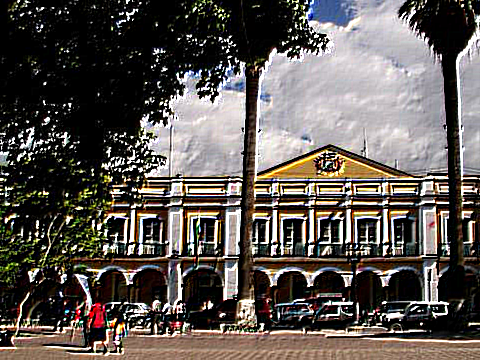

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# edge detection first keranl
Kedge = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# second kernal box blur
Kblur = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]]) / 9.0

# third kernal emboss
Kemboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

# display the kernals
print("1: Edge Detection")
print("2: Box Blur")
print("3: Custom (Emboss)")

# application of image to kernal
image = cv2.imread("1.jpg")
embo = cv2.filter2D(image, -1, Kemboss)
cv2_imshow(embo)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Task 4. Refer to the multiple channels section in the tutorial material, apply the three kernels you built in task 1 to the downloaded image. Visualize the feature maps produced by the three kernels. Combine the three feature maps to a 3-channels feature map and visualize it.

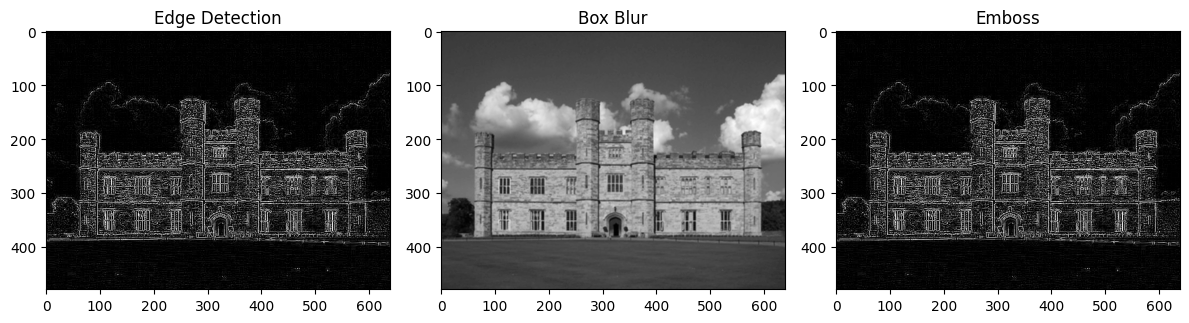

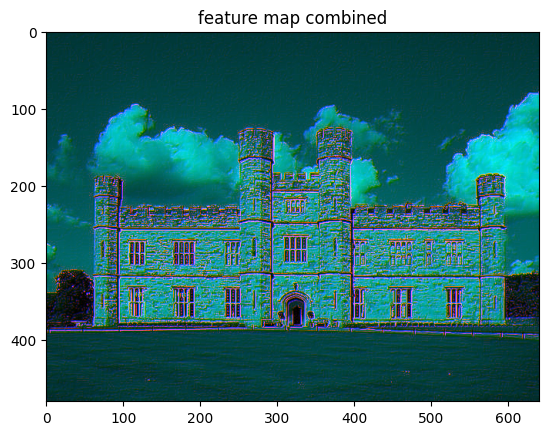

In [6]:
# write your code here
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('001.jpg')

# image to grayscale
Grimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# usage of kernals to grayscale image
Kedge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
Kblur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0
Kemboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

FmapE = cv2.filter2D(Grimg, -1, Kedge)
FmapB = cv2.filter2D(Grimg, -1, Kblur)
FmapEmb = cv2.filter2D(Grimg, -1, Kemboss)

# Visualize the feature maps
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(FmapE, cmap="gray")
plt.title("Edge Detection")

plt.subplot(132)
plt.imshow(FmapB, cmap="gray")
plt.title("Box Blur")

plt.subplot(133)
plt.imshow(FmapE, cmap="gray")
plt.title("Emboss")

plt.tight_layout()
plt.show()

# merging three maps
Fmapcomb = cv2.merge([FmapE, FmapB, FmapEmb])

# showing the merged maps
plt.imshow(Fmapcomb)
plt.title("feature map combined")
plt.show()

## Task 5. Refer to the multiple layers section in the tutorial material, repeatly apply the three kernels to the combined feature map that created by the previous round two times. Visualize the feature maps produced in the process

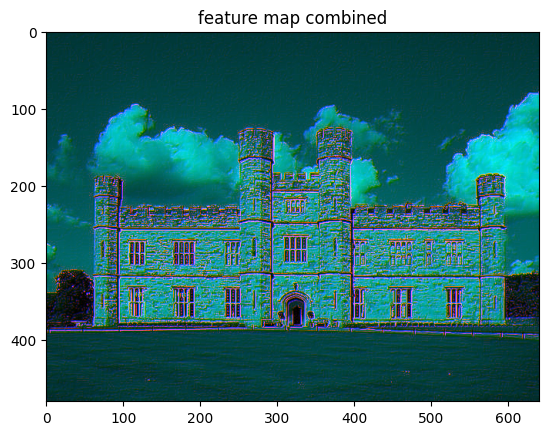

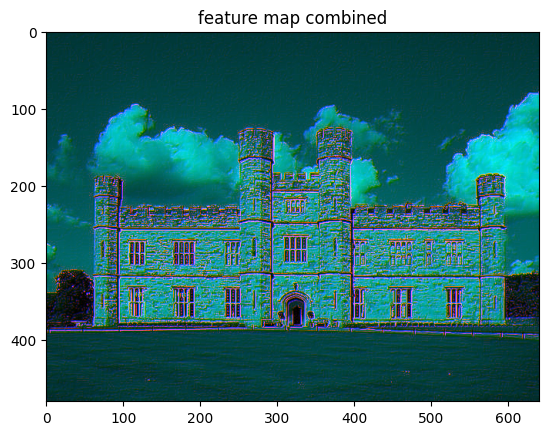

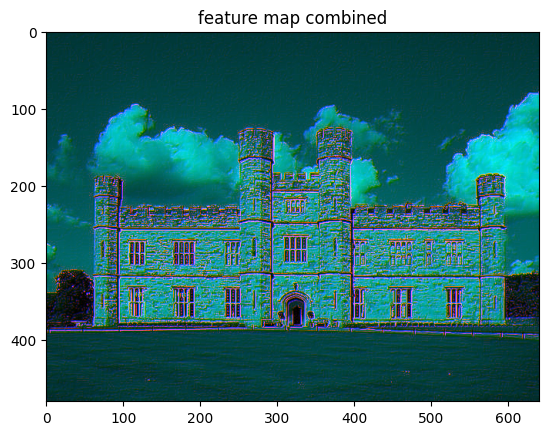

In [7]:
img = cv2.imread('001.jpg')

# image to grayscale
Grimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Kedge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
Kblur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0
Kemboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

FmapE = cv2.filter2D(Grimg, -1, Kedge)
FmapB = cv2.filter2D(Grimg, -1, Kblur)
FmapEmb = cv2.filter2D(Grimg, -1, Kemboss)

# Combine the three feature maps into a 3-channel feature map
Fmapcomb = cv2.merge([FmapE, FmapB, FmapEmb])

# showing the merged maps
plt.imshow(Fmapcomb)
plt.title("feature map combined")
plt.show()

# looping for two rounds
for _ in range(2):
    FmapE = cv2.filter2D(Grimg, -1, Kedge)
    FmapB = cv2.filter2D(Grimg, -1, Kblur)
    FmapEmb = cv2.filter2D(Grimg, -1, Kemboss)

    # merging three maps
    Fmapcomb = cv2.merge([FmapE, FmapB, FmapEmb])

    # showing the merged maps
    plt.imshow(Fmapcomb)
    plt.title("feature map combined")
    plt.show()
